<a href="https://colab.research.google.com/github/iam-fern/Generate_addition_2X/blob/main/GQtest_data(y_hat)_add_delta_(_0_4)_n20_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition_2X/addition_delta_-0.4'

In [4]:
os.listdir(base_path)

['data_add_delta_-0.4_n20.csv',
 'data_add_delta_-0.4_n30.csv',
 'data_add_delta_-0.4_n60.csv',
 'data_add_delta_-0.4_n120.csv',
 'data_add_delta_-0.4_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_-0.4_n20.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,91.058769,69.277009,0.288843,170.624620,170.070113,0.554507
1,0.0,1.0,60.677823,99.669209,-0.232860,170.114172,170.112966,0.001206
2,0.0,2.0,71.958544,68.761594,-0.279486,150.440652,150.549004,-0.108352
3,0.0,3.0,27.658269,75.884453,0.057508,113.600230,113.559186,0.041044
4,0.0,4.0,91.869664,95.186306,-0.525482,196.530488,196.687790,-0.157302
...,...,...,...,...,...,...,...,...
19995,999.0,15.0,23.794421,28.517975,0.729495,63.041891,62.751959,0.289932
19996,999.0,16.0,38.569473,51.742528,0.421735,100.733736,100.503830,0.229907
19997,999.0,17.0,87.886143,81.105405,-0.053194,178.938355,178.637081,0.301274
19998,999.0,18.0,27.511540,81.955787,-0.611506,118.855821,119.567238,-0.711418


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,91.058769,69.277009,0.288843,170.624620,170.070113,0.554507
1,0.0,1.0,60.677823,99.669209,-0.232860,170.114172,170.112966,0.001206
2,0.0,2.0,71.958544,68.761594,-0.279486,150.440652,150.549004,-0.108352
3,0.0,3.0,27.658269,75.884453,0.057508,113.600230,113.559186,0.041044
4,0.0,4.0,91.869664,95.186306,-0.525482,196.530488,196.687790,-0.157302
...,...,...,...,...,...,...,...,...
19995,999.0,15.0,23.794421,28.517975,0.729495,63.041891,62.751959,0.289932
19996,999.0,16.0,38.569473,51.742528,0.421735,100.733736,100.503830,0.229907
19997,999.0,17.0,87.886143,81.105405,-0.053194,178.938355,178.637081,0.301274
19998,999.0,18.0,27.511540,81.955787,-0.611506,118.855821,119.567238,-0.711418


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    91.058769  69.277009  0.288843  170.624620  170.070113  0.554507
      1.0    60.677823  99.669209 -0.232860  170.114172  170.112966  0.001206
      2.0    71.958544  68.761594 -0.279486  150.440652  150.549004 -0.108352
      3.0    27.658269  75.884453  0.057508  113.600230  113.559186  0.041044
      4.0    91.869664  95.186306 -0.525482  196.530488  196.687790 -0.157302
...                ...        ...       ...         ...         ...       ...
999.0 15.0   23.794421  28.517975  0.729495   63.041891   62.751959  0.289932
      16.0   38.569473  51.742528  0.421735  100.733736  100.503830  0.229907
      17.0   87.886143  81.105405 -0.053194  178.938355  178.637081  0.301274
      18.0   27.511540  81.955787 -0.611506  118.855821  119.567238 -0.711418
      19.0   49.265420  39.715064  0.076185   99.056670   99.161018 -0.104348

[20000 rows x 6 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    91.058769  69.277009  0.288843  170.624620  170.070113  0.554507
      1.0    60.677823  99.669209 -0.232860  170.114172  170.112966  0.001206
      2.0    71.958544  68.761594 -0.279486  150.440652  150.549004 -0.108352
      3.0    27.658269  75.884453  0.057508  113.600230  113.559186  0.041044
      4.0    91.869664  95.186306 -0.525482  196.530488  196.687790 -0.157302
...                ...        ...       ...         ...         ...       ...
999.0 15.0   23.794421  28.517975  0.729495   63.041891   62.751959  0.289932
      16.0   38.569473  51.742528  0.421735  100.733736  100.503830  0.229907
      17.0   87.886143  81.105405 -0.053194  178.938355  178.637081  0.301274
      18.0   27.511540  81.955787 -0.611506  118.855821  119.567238 -0.711418
      19.0   49.265420  39.715064  0.076185   99.056670   99.161018 -0.104348

[20000 rows x 6 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,91.058769,69.277009,0.288843,170.624620,170.070113,0.554507
1,0.0,1.0,60.677823,99.669209,-0.232860,170.114172,170.112966,0.001206
2,0.0,2.0,71.958544,68.761594,-0.279486,150.440652,150.549004,-0.108352
3,0.0,3.0,27.658269,75.884453,0.057508,113.600230,113.559186,0.041044
4,0.0,4.0,91.869664,95.186306,-0.525482,196.530488,196.687790,-0.157302
...,...,...,...,...,...,...,...,...
19995,999.0,15.0,23.794421,28.517975,0.729495,63.041891,62.751959,0.289932
19996,999.0,16.0,38.569473,51.742528,0.421735,100.733736,100.503830,0.229907
19997,999.0,17.0,87.886143,81.105405,-0.053194,178.938355,178.637081,0.301274
19998,999.0,18.0,27.511540,81.955787,-0.611506,118.855821,119.567238,-0.711418


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    91.058769  69.277009  0.288843  170.624620  170.070113  0.554507
      1.0    60.677823  99.669209 -0.232860  170.114172  170.112966  0.001206
      2.0    71.958544  68.761594 -0.279486  150.440652  150.549004 -0.108352
      3.0    27.658269  75.884453  0.057508  113.600230  113.559186  0.041044
      4.0    91.869664  95.186306 -0.525482  196.530488  196.687790 -0.157302
...                ...        ...       ...         ...         ...       ...
999.0 15.0   23.794421  28.517975  0.729495   63.041891   62.751959  0.289932
      16.0   38.569473  51.742528  0.421735  100.733736  100.503830  0.229907
      17.0   87.886143  81.105405 -0.053194  178.938355  178.637081  0.301274
      18.0   27.511540  81.955787 -0.611506  118.855821  119.567238 -0.711418
      19.0   49.265420  39.715064  0.076185   99.056670   99.161018 -0.104348

[20000 rows x 6 columns]

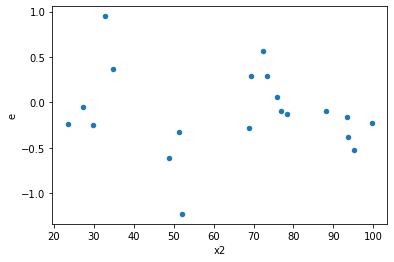

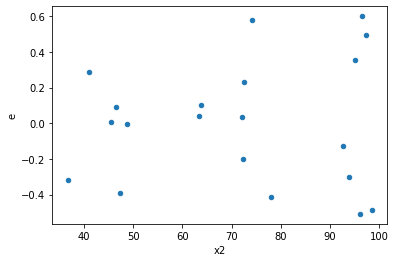

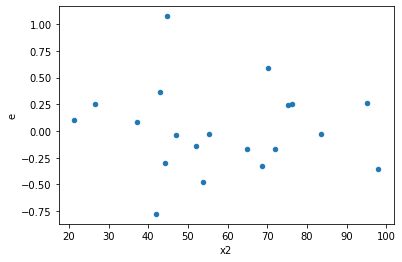

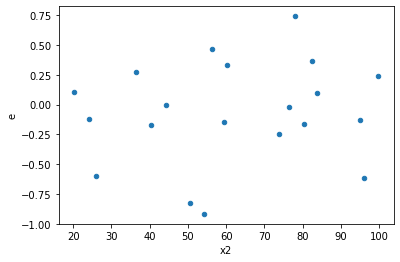

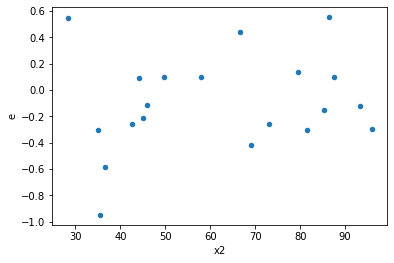

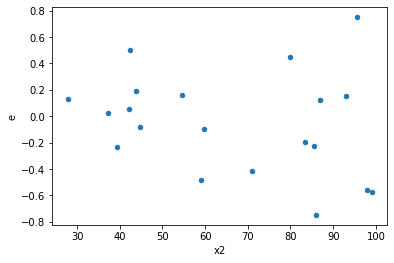

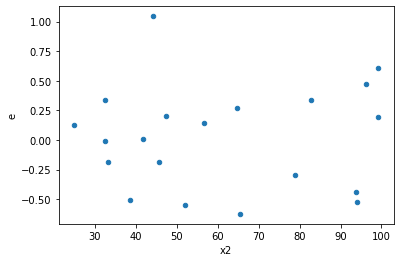

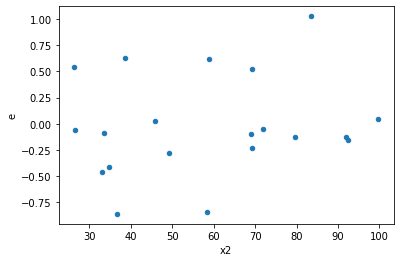

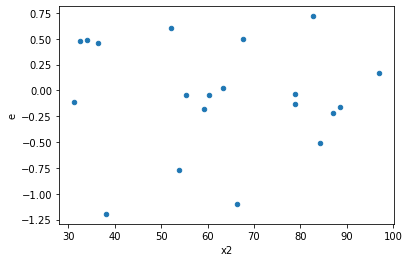

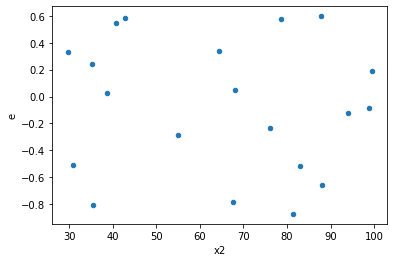

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,6.0,6.0,0.7580698169836712,1.1061876405831457,0.12634496949727853,0.1843646067638576,1.459216045541321,0.6579300540101198,0.6710349729949401,0.3289650270050599,Reject005=1 : Homoscedasticity
1.0,6.0,6.0,0.05241480832769477,0.7570051261611567,0.008735801387949127,0.12616752102685944,14.44258121537712,0.004917022119272474,0.9975414889403638,0.002458511059636237,Reject005=0 : Heteroscedasticity
3.0,6.0,6.0,0.5150358579090706,0.7236750997895528,0.08583930965151176,0.12061251663159213,1.4050965358557954,0.6901110778969768,0.6549444610515116,0.3450555389484884,Reject005=1 : Homoscedasticity
5.0,6.0,6.0,0.38423886911824445,0.858536336828055,0.0640398115197074,0.1430893894713425,2.234381802128019,0.35086568785636896,0.8245671560718155,0.17543284392818448,Reject005=1 : Homoscedasticity
8.0,6.0,6.0,1.0617878157236804,1.1068968358564915,0.17696463595394674,0.1844828059760819,1.0424840250234613,0.9610109194597025,0.5194945402701487,0.48050545972985126,Reject005=1 : Homoscedasticity
9.0,6.0,6.0,0.9303418819237368,1.1995440183886812,0.1550569803206228,0.1999240030647802,1.2893582904257683,0.765525422784493,0.6172372886077535,0.3827627113922465,Reject005=1 : Homoscedasticity
10.0,6.0,6.0,0.5683278413345296,1.0724297351412364,0.09472130688908827,0.17873828919020607,1.886991375652107,0.4591554834288316,0.7704222582855842,0.2295777417144158,Reject005=1 : Homoscedasticity
16.0,6.0,6.0,0.2422813240042727,0.4561761410694315,0.040380220667378786,0.07602935684490525,1.882836586535191,0.4606918203595982,0.7696540898202009,0.2303459101797991,Reject005=1 : Homoscedasticity
17.0,6.0,6.0,0.7795177944445728,1.6402438254337683,0.1299196324074288,0.27337397090562804,2.1041775275989507,0.38717235742616607,0.806413821286917,0.19358617871308303,Reject005=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,6.0,6.0,0.7580698169836712,1.1061876405831457,0.12634496949727853,0.1843646067638576,1.459216045541321,0.6579300540101198,Reject005=1 : Homoscedasticity
1.0,6.0,6.0,0.05241480832769477,0.7570051261611567,0.008735801387949127,0.12616752102685944,14.44258121537712,0.004917022119272474,Reject005=0 : Heteroscedasticity
2.0,6.0,6.0,1.8436948214963635,0.6746384517283917,0.3072824702493939,0.11243974195473194,0.3659165518406389,0.2465544043880386,Reject005=1 : Homoscedasticity
3.0,6.0,6.0,0.5150358579090706,0.7236750997895528,0.08583930965151176,0.12061251663159213,1.4050965358557954,0.6901110778969768,Reject005=1 : Homoscedasticity
4.0,6.0,6.0,0.9429028458158367,0.1416475858491893,0.15715047430263945,0.023607930974864882,0.15022500618993276,0.03628333857823402,Reject005=0 : Heteroscedasticity
5.0,6.0,6.0,0.38423886911824445,0.858536336828055,0.0640398115197074,0.1430893894713425,2.234381802128019,0.35086568785636896,Reject005=1 : Homoscedasticity
6.0,6.0,6.0,1.1627560799598982,1.0430523805618042,0.19379267999331637,0.17384206342696737,0.8970517536212561,0.898448040124846,Reject005=1 : Homoscedasticity
7.0,6.0,6.0,2.499682439367276,1.1530778534287542,0.416613739894546,0.1921796422381257,0.4612897363557202,0.36884810685062525,Reject005=1 : Homoscedasticity
8.0,6.0,6.0,1.0617878157236804,1.1068968358564915,0.17696463595394674,0.1844828059760819,1.0424840250234613,0.9610109194597025,Reject005=1 : Homoscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject005=1 : Homoscedasticity      899
Reject005=0 : Heteroscedasticity    101
Name: Result_test, dtype: int64